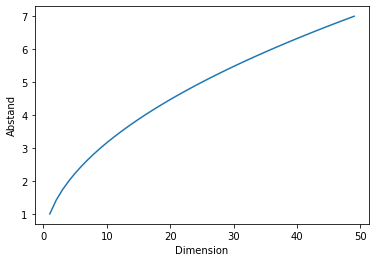

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#fluch der dimensionalität

#Euklidischer Abstand
anzahl_dim=50
abstand_array=np.zeros(anzahl_dim-1)
for i in range(1,anzahl_dim):
    #print(np.ones(i))
    abstand_array[i-1]=np.sqrt(np.sum(np.ones(i)))

#print(abstand_array)
plt.figure()
plt.xlabel("Dimension")
plt.ylabel("Abstand")
plt.plot(range(1,anzahl_dim),abstand_array)

In [4]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import kerastuner as kt
from sklearn.model_selection import train_test_split
import seaborn as sns
new_model = tf.keras.models.load_model('../Models/model_overlap_from_spectrum_err_0_0057')

new_model.summary()
tf.keras.utils.plot_model(new_model,to_file="Test.png", show_shapes=True,expand_nested=True)

/tmp/ipykernel_588657/3386893273.py:5: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt
2022-05-20 13:38:17.585631: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-05-20 13:38:17.585764: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-05-20 13:38:17.586091: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 16)                240       
_________________________________________________________________
dense_29 (Dense)             (None, 256)               4352      
_________________________________________________________________
dense_30 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_31 (Dense)             (None, 2048)              1050624   
_________________________________________________________________
dense_32 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
dense_33 (Dense)             (None, 64)                65600     
_________________________________________________________________
dense_34 (Dense)             (None, 16)               

In [5]:

all_labels_features=["delta","lambda","all_maxima","Intensity","overlap_s0_s2_k6a","overlap_s0_s2_k1","overlap_s0_s2_k9a"]
all_data=pd.read_csv("../../generated_Data/all_param_4_values_with_overlap.csv")
df_feature_labels=all_data[all_labels_features]

max_no_of_peak_list=max(all_data["no_of_max"])
print(max_no_of_peak_list)
df_feature_labels.head()
#convert string lists into numpy arrays in dict

all_maxima_array=np.asarray([  np.asarray([x for x in row.replace("[","").replace("]","").replace("  "," ",5).replace(" ",";").split(";") if x!=""],dtype=np.float64)     for row in df_feature_labels["all_maxima"] ])

intensity_array=np.asarray([  np.asarray([x for x in row.replace("[","").replace("]","").replace("  "," ",5).replace(" ",";").split(";") if x!=""],dtype=np.float64)     for row in df_feature_labels["Intensity"] ])

overlap_s0_s2_k6a_array=np.asarray([  np.asarray([x for x in row.replace(",","").replace("[","").replace("]","").replace("  "," ",5).replace(" ",";").split(";") if x!=""],dtype=np.float64)     for row in df_feature_labels["overlap_s0_s2_k6a"] ])

overlap_s0_s2_k1_array=np.asarray([  np.asarray([x for x in row.replace(",","").replace("[","").replace("]","").replace("  "," ",5).replace(" ",";").split(";") if x!=""],dtype=np.float64)     for row in df_feature_labels["overlap_s0_s2_k1"] ])

overlap_s0_s2_k9a_array=np.asarray([  np.asarray([x for x in row.replace(",","").replace("[","").replace("]","").replace("  "," ",5).replace(" ",";").split(";") if x!=""],dtype=np.float64)     for row in df_feature_labels["overlap_s0_s2_k9a"] ])
#pad all_maxima_array and intensity_array
all_maxima_array_padded=np.zeros((len(all_maxima_array),max_no_of_peak_list))
intensity_array_padded=np.zeros((len(intensity_array),max_no_of_peak_list))

for i in range(len(all_maxima_array)):
    for j in range(len(all_maxima_array[i])):
        all_maxima_array_padded[i][j]=all_maxima_array[i][j]
        intensity_array_padded[i][j]=intensity_array[i][j]

concat_label=np.concatenate((overlap_s0_s2_k6a_array,overlap_s0_s2_k1_array,overlap_s0_s2_k9a_array),axis=1)
concat_feature=np.concatenate((all_maxima_array_padded,intensity_array_padded),axis=1)

x_train, x_test,y_train,y_test = train_test_split( concat_feature, concat_label  ,test_size=0.20, random_state=42)
        
  #returns dataframe
def test_model(model,x_data, y_data ,label_name):
    evaluation=model.evaluate(x = x_data, y = y_data, batch_size=batch_size)
    predicted = model.predict(x_data)
    df_test=pd.DataFrame(y_data,columns=[label_name])
   # print(predicted)
    df_predict=pd.DataFrame(predicted,columns=[label+"_pred" for label in label_name])
    return pd.concat([df_test,df_predict], axis=1)
      

7


/tmp/ipykernel_588657/365885153.py:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  all_maxima_array=np.asarray([  np.asarray([x for x in row.replace("[","").replace("]","").replace("  "," ",5).replace(" ",";").split(";") if x!=""],dtype=np.float64)     for row in df_feature_labels["all_maxima"] ])
/tmp/ipykernel_588657/365885153.py:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  intensity_array=np.asarray([  np.asarray([x for x in row.replace("[","").replace("]","").replace("  "," ",5).replace(" ",";").split(";") if x!=""],dtype=np.float64)     f

In [6]:
all_label_list=['k6a 0',"k6a 1","k6a 2","k6a 3","k6a 4","k1 0","k1 1","k1 2","k1 3","k1 4","k9a 0","k9a 1","k9a 2","k9a 3","k9a 4"]
batch_size=150
delta_test_result=test_model(new_model,x_test,y_test,all_label_list)

columns_names=delta_test_result.columns

compare_k6a=columns_names[[0,1,2,3,4,15,16,17,18,19]]
compare_k1=columns_names[[5,6,7,8,9,20,21,22,23,24]]
compare_k9a=columns_names[[10,11,12,13,14,25,26,27,28,29]]
#print(compare_k6a)

delta_test_result[compare_k6a].head(50)
#delta_test_result[compare_k1].head(50)
#delta_test_result[compare_k9a].head(50)


2022-05-20 13:38:19.177435: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-05-20 13:38:19.197394: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3000000000 Hz


88/88 [==============================] - 2s 22ms/step - loss: 0.0055 - mean_absolute_error: 0.0055


,"(k6a 0,)","(k6a 1,)","(k6a 2,)","(k6a 3,)","(k6a 4,)",k6a 0_pred,k6a 1_pred,k6a 2_pred,k6a 3_pred,k6a 4_pred
0,0.9307,0.0669,0.0024,0.0001,0.000,0.930712,0.067350,0.002743,0.0,0.0
1,0.9307,0.0669,0.0024,0.0001,0.000,0.932051,0.066253,0.002037,0.0,0.0
2,0.9307,0.0669,0.0024,0.0001,0.000,0.938701,0.062366,0.000000,0.0,0.0
3,0.9307,0.0669,0.0024,0.0001,0.000,0.938760,0.062223,0.000000,0.0,0.0
4,0.9307,0.0669,0.0024,0.0001,0.000,0.938827,0.062188,0.000000,0.0,0.0
5,0.9307,0.0669,0.0024,0.0001,0.000,0.931544,0.066840,0.000000,0.0,0.0
6,0.5232,0.3386,0.1098,0.0239,0.004,0.523987,0.337338,0.107529,0.0,0.0
7,0.9307,0.0669,0.0024,0.0001,0.000,0.932053,0.066145,0.000000,0.0,0.0
8,0.9307,0.0669,0.0024,0.0001,0.000,0.931092,0.067347,0.000000,0.0,0.0
9,0.9307,0.0669,0.0024,0.0001,0.000,0.931982,0.065534,0.000000,0.0,0.0


In [7]:
new_model.summary()


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 16)                240       
_________________________________________________________________
dense_29 (Dense)             (None, 256)               4352      
_________________________________________________________________
dense_30 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_31 (Dense)             (None, 2048)              1050624   
_________________________________________________________________
dense_32 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
dense_33 (Dense)             (None, 64)                65600     
_________________________________________________________________
dense_34 (Dense)             (None, 16)               

In [8]:
Abweichung_k6a=delta_test_result[compare_k6a[0]]-delta_test_result[compare_k6a[5]]
print(Abweichung_k6a)


Abweichung_k1=delta_test_result[compare_k1[0]]-delta_test_result[compare_k1[5]]
#print(Abweichung_k1)
Abweichung_k9a=delta_test_result[compare_k9a[0]]-delta_test_result[compare_k9a[5]]
#print(Abweichung_k9a)
#norm distribution
from scipy.stats import norm
mu, std = norm.fit(Abweichung_k6a)
print(mu,std)

0       -0.000012
1       -0.001351
2       -0.008001
3       -0.008060
4       -0.008127
           ...   
13088   -0.000177
13089   -0.001661
13090    0.000687
13091   -0.000732
13092   -0.000583
Length: 13093, dtype: float64
-0.001479371644712571 0.016403098285374656


In [17]:
def histogramm(data,name,max_range,bins_val,y_max=0,savename=None):
    mu, std = norm.fit(data)
    
    
    plt.figure(figsize=(8,5))
    mf = 18
    plt.hist(data, bins=bins_val)
    if max_range is not None:
        plt.xlim(-max_range, max_range)
    if(y_max != 0):
        plt.ylim(0, y_max)
    mu, std = norm.fit(data)

    plt.xlabel("Differenz", fontsize=mf)
    plt.title(name+" mean = %.4f,  std = %.4f" % (mu, std),fontsize=mf)
    if savename is not None:
        savename=savename.replace(" ", "_")
        plt.savefig("plots/hist/"+savename+".eps", format="eps")
    plt.show()

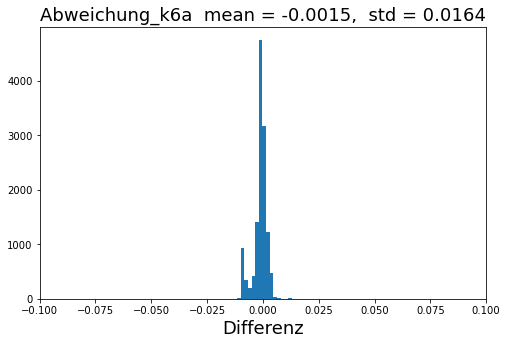

In [19]:
histogramm(Abweichung_k6a,"Abweichung_k6a ",0.1,500,savename="Abweichung_k6a")
#histogramm(Abweichung_k6a,"Abweichung_k6a ",0.5,500,10)


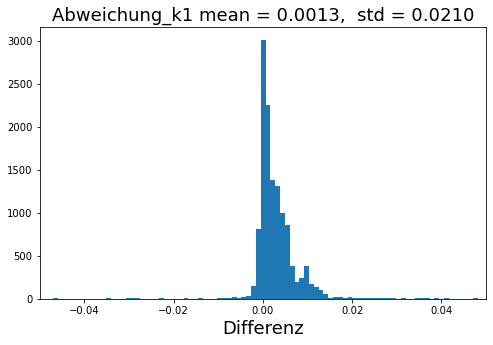

In [23]:
histogramm(Abweichung_k1,"Abweichung_k1",0.05,400,savename="Abweichung_k1")
#histogramm(Abweichung_k1,"Abweichung_k1",0.5,400,15)


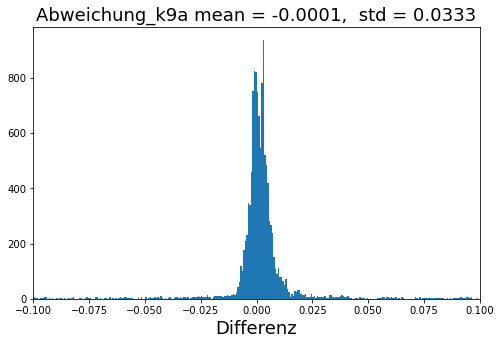

In [22]:
histogramm(Abweichung_k9a,"Abweichung_k9a",0.1,500,savename="Abweichung_k9a")
#histogramm(Abweichung_k9a,"Abweichung_k9a",0.5,500,20)


In [ ]:
#test save as -h5
new_model.save("overlap_model.h5")

OSError: SavedModel file does not exist at: Modells/delta_100_best_model_err_0_05/{saved_model.pbtxt|saved_model.pb}

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  80        
_________________________________________________________________
dense_1 (Dense)              multiple                  1640      
_________________________________________________________________
dense_2 (Dense)              multiple                  410       
_________________________________________________________________
Output (Dense)               multiple                  11        
Total params: 2,141
Trainable params: 2,141
Non-trainable params: 0
_________________________________________________________________
